# ÉTAPE 1 : Exploration les données

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuration pour l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')

# Chargement des datasets
try:
    # Dataset 1
    df1 = pd.read_csv(r"C:\Users\ADMIN\ANIP CHALLENGE 2\clean\tableau_1_dataset_consolide_analyse_final_clean_unique.csv")
    print("Dataset 1 chargé avec succès")
    print(f"Shape: {df1.shape}")
    
    # Dataset 2
    df2 = pd.read_csv(r"C:\Users\ADMIN\ANIP CHALLENGE 2\clean\tableau_2_dataset_consolide_analyse_final_2.csv")
    print("Dataset 2 chargé avec succès")
    print(f"Shape: {df2.shape}")
    
except FileNotFoundError as e:
    print(f"Erreur de chargement: {e}")
    # Création de données d'exemple pour la démonstration
    print("Création de données d'exemple...")
    
    # Dataset 1 (à partir du contenu fourni)
    data1 = {
        'iso3': ['DNK', 'AUT', 'FIN', 'DEU', 'FRA', 'NLD', 'SWE', 'BEL', 'ITA', 'SVN'],
        'country_name': ['Denmark', 'Austria', 'Finland', 'Germany', 'France', 'Netherlands', 'Sweden', 'Belgium', 'Italy', 'Slovenia'],
        'year': [2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
        'europ_cofog_recretion_culture_eur_per_capita': [265.9, 246.0, 235.0, 228.1, 213.9, 209.0, 202.8, 190.7, 168.9, 159.1],
        'public_expenditure_usd_per_capita': [82.12, 61.32, 79.59, 60.65, 66.68, 75.01, 74.27, 65.81, 51.71, 46.45],
        'private_expenditure_usd_per_capita': [98.83, 75.64, 84.97, 112.3, 87.01, 99.6, 90.7, 88.01, 76.0, 62.96],
        'expenditure_per_capita_usd': [180.95, 136.95, 164.56, 172.95, 153.69, 174.61, 164.97, 153.82, 127.72, 109.41],
        'human_development_index': [0.936, 0.91, 0.93, 0.938, 0.892, 0.932, 0.937, 0.924, 0.882, 0.903],
        'gdp_per_capita_usd': [53094.0, 43915.0, 42560.0, 41911.0, 36702.0, 45794.0, 51198.0, 40894.0, 30640.0, 20697.0],
        'fifa_points': [1530.0, 1535.0, 1250.0, 1637.0, 1685.0, 1738.0, 1457.0, 1717.0, 1656.0, 1266.0],
        'fifa_rank': [12.0, 11.0, 26.0, 8.0, 6.0, 4.0, 16.0, 5.0, 7.0, 24.0]
    }
    df1 = pd.DataFrame(data1)
    
    # Dataset 2 (exemple)
    data2 = {
        'year': [2015, 2015, 2015, 2015, 2015],
        'country_name': ['Denmark', 'Austria', 'Finland', 'Germany', 'France'],
        'sexe': ['Total', 'Total', 'Total', 'Total', 'Total'],
        'iso3': ['DNK', 'AUT', 'FIN', 'DEU', 'FRA'],
        'youth_unemployment_rate_pct': [10.5, 8.2, 15.3, 6.8, 22.1],
        'age_min': [15, 15, 15, 15, 15],
        'age_max': [24, 24, 24, 24, 24],
        'life_expectancy': [80.5, 81.2, 81.5, 80.8, 82.3]
    }
    df2 = pd.DataFrame(data2)

# Exploration initiale des datasets
print("\n" + "="*50)
print("EXPLORATION INITIALE DES DATASETS")
print("="*50)

print("\nDataset 1 - Informations:")
print(df1.info())
print("\nDataset 1 - Premières lignes:")
print(df1.head())

print("\nDataset 2 - Informations:")
print(df2.info())
print("\nDataset 2 - Premières lignes:")
print(df2.head())

Dataset 1 chargé avec succès
Shape: (140, 11)
Dataset 2 chargé avec succès
Shape: (520, 8)

EXPLORATION INITIALE DES DATASETS

Dataset 1 - Informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   iso3                                          140 non-null    object 
 1   country_name                                  140 non-null    object 
 2   year                                          140 non-null    int64  
 3   europ_cofog_recretion_culture_eur_per_capita  140 non-null    float64
 4   public_expenditure_usd_per_capita             140 non-null    float64
 5   private_expenditure_usd_per_capita            140 non-null    float64
 6   expenditure_per_capita_usd                    140 non-null    float64
 7   human_development_index                       140 non-null    


ÉTAPE 1: EXPLORATION APPROFONDIE DES DONNÉES

--- DATASET 1: STATISTIQUES DESCRIPTIVES ---
              year  europ_cofog_recretion_culture_eur_per_capita  \
count   140.000000                                    140.000000   
mean   2018.000000                                    170.074286   
std       2.007181                                     71.599770   
min    2015.000000                                     50.400000   
25%    2016.000000                                    104.375000   
50%    2018.000000                                    168.700000   
75%    2020.000000                                    228.975000   
max    2021.000000                                    328.400000   

       public_expenditure_usd_per_capita  private_expenditure_usd_per_capita  \
count                         140.000000                          140.000000   
mean                           50.881000                           69.765000   
std                            18.639634               

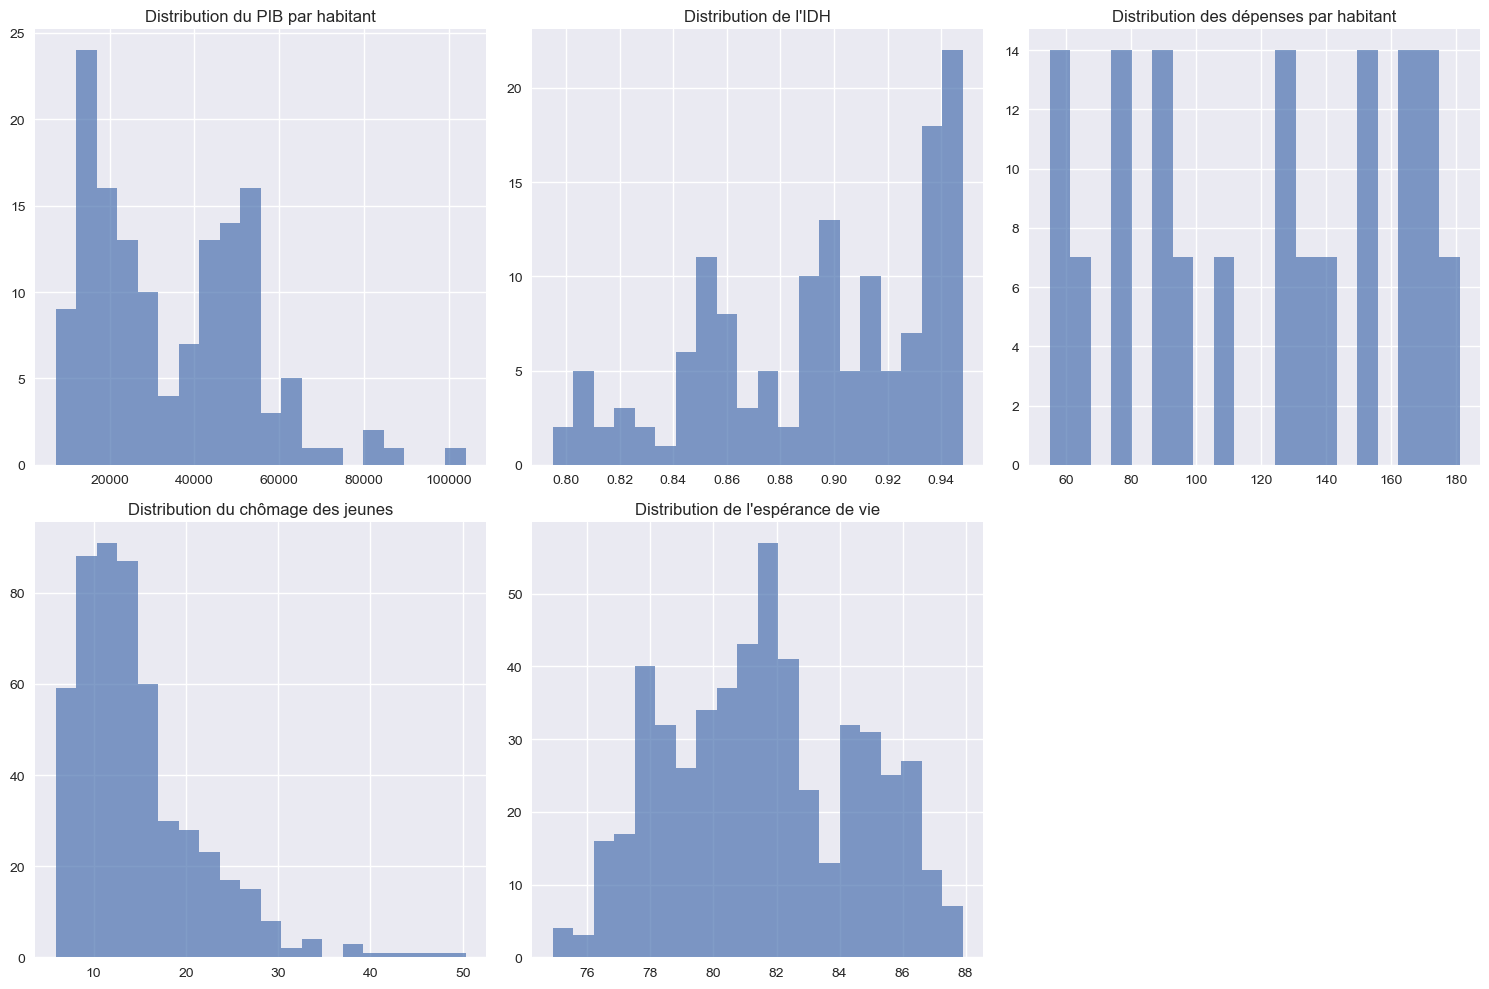

In [9]:
# ÉTAPE 1: EXPLORATION APPROFONDIE DES DONNÉES
print("\n" + "="*50)
print("ÉTAPE 1: EXPLORATION APPROFONDIE DES DONNÉES")
print("="*50)

# Exploration du Dataset 1
print("\n--- DATASET 1: STATISTIQUES DESCRIPTIVES ---")
print(df1.describe())

print("\n--- DATASET 1: VALEURS MANQUANTES ---")
print(df1.isnull().sum())

print("\n--- DATASET 1: PAYS UNIQUES ---")
print(f"Nombre de pays: {df1['country_name'].nunique()}")
print(f"Pays: {df1['country_name'].unique()}")

print("\n--- DATASET 1: ANNÉES COUVERTES ---")
print(f"Années: {sorted(df1['year'].unique())}")

# Exploration du Dataset 2
print("\n--- DATASET 2: STATISTIQUES DESCRIPTIVES ---")
print(df2.describe())

print("\n--- DATASET 2: VALEURS MANQUANTES ---")
print(df2.isnull().sum())

print("\n--- DATASET 2: RÉPARTITION PAR SEXE ---")
print(df2['sexe'].value_counts())

# Vérification de la cohérence entre les deux datasets
print("\n--- COHÉRENCE ENTRE LES DATASETS ---")
common_countries = set(df1['country_name']).intersection(set(df2['country_name']))
print(f"Pays communs entre les deux datasets: {len(common_countries)}")
print(f"Pays communs: {common_countries}")

# Analyse des types de données
print("\n--- TYPES DE DONNÉES ---")
print("Dataset 1 types:")
print(df1.dtypes)
print("\nDataset 2 types:")
print(df2.dtypes)

# Vérification des doublons
print("\n--- DOUBLONS ---")
print(f"Doublons Dataset 1: {df1.duplicated().sum()}")
print(f"Doublons Dataset 2: {df2.duplicated().sum()}")

# Visualisation rapide de la distribution des principales variables
plt.figure(figsize=(15, 10))

# Distribution des variables économiques
plt.subplot(2, 3, 1)
df1['gdp_per_capita_usd'].hist(bins=20, alpha=0.7)
plt.title('Distribution du PIB par habitant')

plt.subplot(2, 3, 2)
df1['human_development_index'].hist(bins=20, alpha=0.7)
plt.title('Distribution de l\'IDH')

plt.subplot(2, 3, 3)
df1['expenditure_per_capita_usd'].hist(bins=20, alpha=0.7)
plt.title('Distribution des dépenses par habitant')

# Distribution des variables du Dataset 2
plt.subplot(2, 3, 4)
df2['youth_unemployment_rate_pct'].hist(bins=20, alpha=0.7)
plt.title('Distribution du chômage des jeunes')

plt.subplot(2, 3, 5)
df2['life_expectancy'].hist(bins=20, alpha=0.7)
plt.title('Distribution de l\'espérance de vie')

plt.tight_layout()
plt.show()


In [11]:
# ÉTAPE 2: FILTRAGE ET PRÉPARATION DES DONNÉES
print("\n" + "="*50)
print("ÉTAPE 2: FILTRAGE ET PRÉPARATION DES DONNÉES")
print("="*50)

# Liste des 19 pays communs
common_countries = ['Slovakia', 'Portugal', 'Italy', 'Slovenia', 'Spain', 'Croatia', 
                   'Netherlands', 'Germany', 'Denmark', 'France', 'Austria', 'Sweden', 
                   'Hungary', 'Bulgaria', 'Ireland', 'Belgium', 'Finland', 'Poland', 'Romania']

# Filtrer le Dataset 1 pour garder seulement les 19 pays communs
df1_filtered = df1[df1['country_name'].isin(common_countries)].copy()
print(f"Dataset 1 après filtrage: {df1_filtered.shape}")

# Préparer le Dataset 2 : calculer la moyenne entre Male et Female et supprimer la colonne sexe
print("\n--- PRÉPARATION DU DATASET 2 ---")

# Vérifier la structure des données par sexe
print("Structure avant agrégation:")
print(df2[df2['country_name'].isin(common_countries)]['sexe'].value_counts())

# Calculer la moyenne pour les variables numériques par pays et année
df2_aggregated = df2[df2['country_name'].isin(common_countries)].groupby(
    ['year', 'country_name', 'iso3', 'age_min', 'age_max']
).agg({
    'youth_unemployment_rate_pct': 'mean',
    'life_expectancy': 'mean'
}).reset_index()

print(f"\nDataset 2 après agrégation: {df2_aggregated.shape}")
print("\nAperçu du Dataset 2 agrégé:")
print(df2_aggregated.head())

# Vérification de l'intégrité des données après filtrage
print("\n--- VÉRIFICATION APRÈS FILTRAGE ---")
print(f"Pays uniques dans df1_filtered: {df1_filtered['country_name'].nunique()}")
print(f"Pays uniques dans df2_aggregated: {df2_aggregated['country_name'].nunique()}")

# Vérifier les années couvertes
print(f"\nAnnées dans df1_filtered: {sorted(df1_filtered['year'].unique())}")
print(f"Années dans df2_aggregated: {sorted(df2_aggregated['year'].unique())}")

# Fusionner les deux datasets pour l'analyse
df_merged = pd.merge(df1_filtered, df2_aggregated, 
                    on=['year', 'country_name', 'iso3'], 
                    how='inner')

print(f"\nDataset fusionné: {df_merged.shape}")
print("\nColonnes du dataset fusionné:")
print(df_merged.columns.tolist())

# Aperçu du dataset fusionné
print("\nAperçu du dataset fusionné:")
print(df_merged.head())

# Vérification finale de la qualité des données
print("\n--- QUALITÉ DES DONNÉES FUSIONNÉES ---")
print(f"Nombre total d'observations: {len(df_merged)}")
print(f"Pays uniques: {df_merged['country_name'].nunique()}")
print(f"Période couverte: {df_merged['year'].min()} - {df_merged['year'].max()}")
print(f"Valeurs manquantes:")
print(df_merged.isnull().sum())

# Sauvegarder le dataset fusionné pour les analyses suivantes
df_merged.to_csv(r"C:\Users\ADMIN\ANIP CHALLENGE 2\clean\dataset_fusionne_19_pays.csv", index=False)
print("\nDataset fusionné sauvegardé.")




ÉTAPE 2: FILTRAGE ET PRÉPARATION DES DONNÉES
Dataset 1 après filtrage: (133, 11)

--- PRÉPARATION DU DATASET 2 ---
Structure avant agrégation:
sexe
Male      190
Female    190
Name: count, dtype: int64

Dataset 2 après agrégation: (190, 7)

Aperçu du Dataset 2 agrégé:
   year country_name iso3  age_min  age_max  youth_unemployment_rate_pct  \
0  2015      Austria  AUT       15       24                         9.40   
1  2015      Belgium  BEL       15       24                        14.90   
2  2015     Bulgaria  BGR       15       24                         8.20   
3  2015      Croatia  HRV       15       24                        11.35   
4  2015      Denmark  DNK       15       24                         9.05   

   life_expectancy  
0            79.60  
1            83.65  
2            81.35  
3            79.55  
4            79.55  

--- VÉRIFICATION APRÈS FILTRAGE ---
Pays uniques dans df1_filtered: 19
Pays uniques dans df2_aggregated: 19

Années dans df1_filtered: [np.int64(2


ÉTAPE 3: ANALYSE DESCRIPTIVE APPROFONDIE

--- TENDANCES HISTORIQUES ---
Évolution du PIB par habitant (moyenne et écart-type):
          mean       std
year                    
2015  30911.00  17198.35
2016  31558.68  17340.59
2017  33664.53  18455.84
2018  36496.53  19776.42
2019  35974.47  19393.82
2020  35877.89  20247.86
2021  40868.53  23549.98

Évolution de l'IDH (moyenne et écart-type):
       mean    std
year              
2015  0.888  0.043
2016  0.892  0.044
2017  0.894  0.044
2018  0.897  0.043
2019  0.901  0.043
2020  0.896  0.044
2021  0.897  0.047

Évolution du chômage des jeunes (moyenne et écart-type):
       mean   std
year             
2015  12.14  4.99
2016  12.40  5.11
2017  12.67  5.21
2018  12.93  5.34
2019  13.19  5.44
2020  20.44  8.43
2021  22.43  9.25


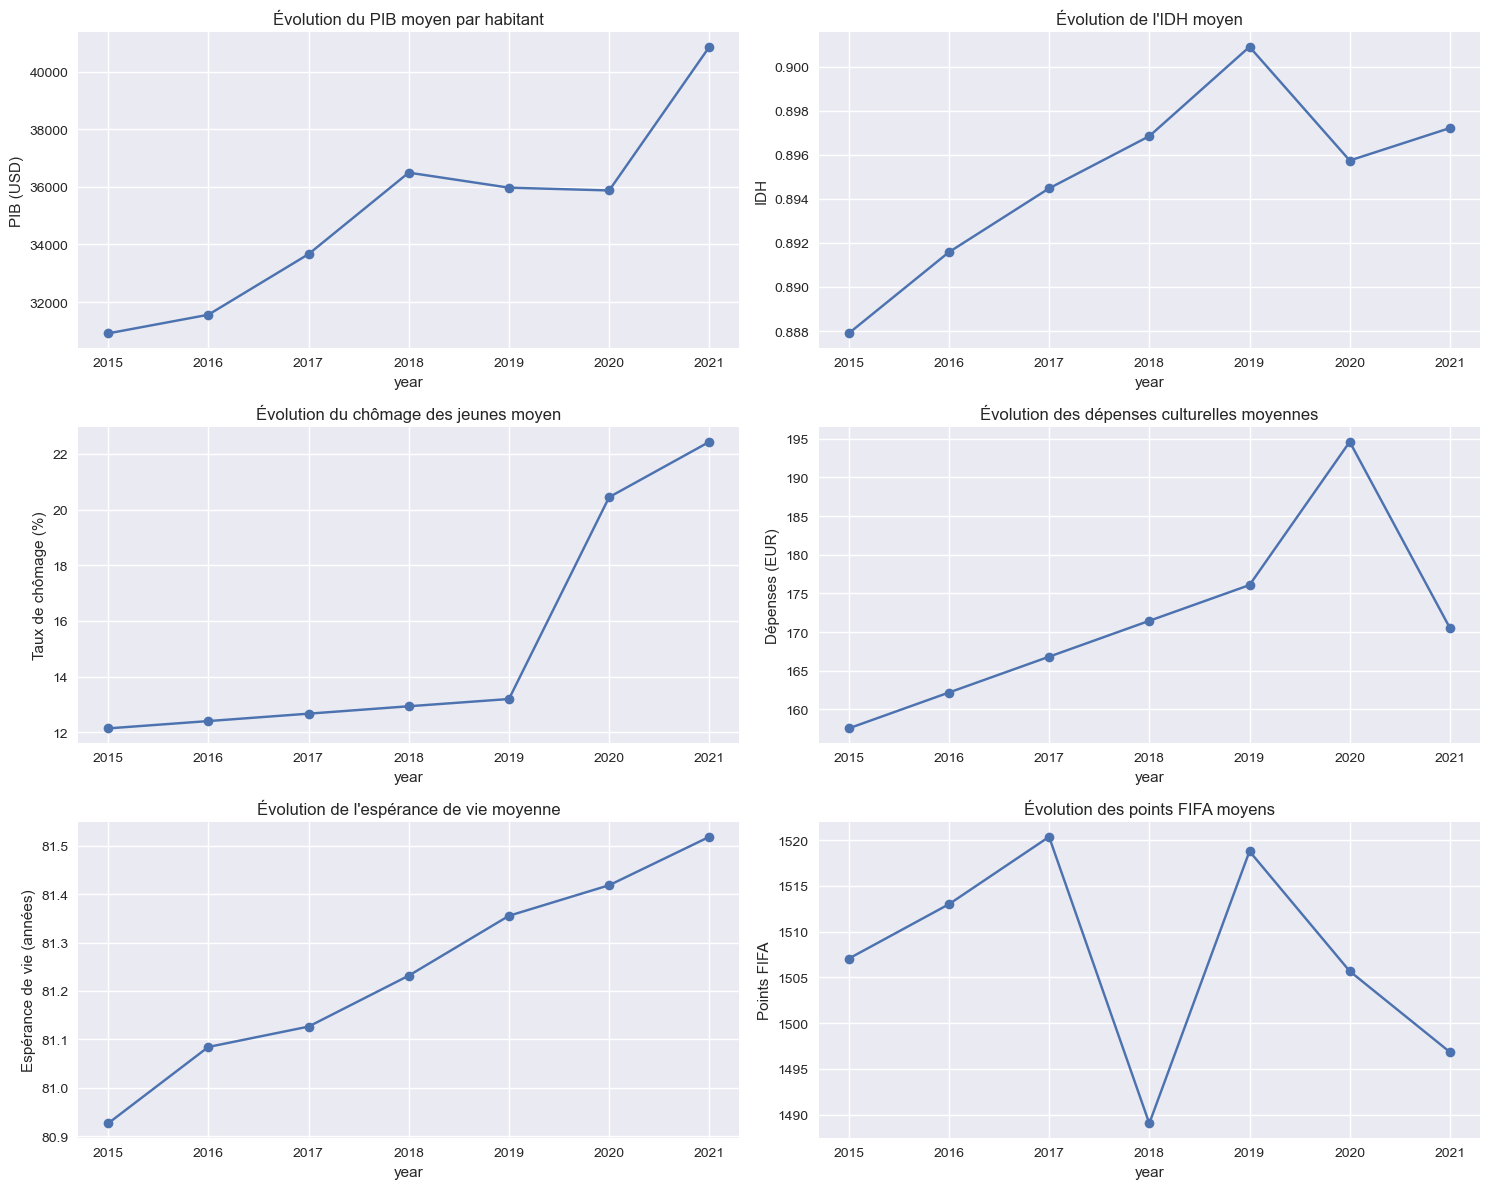


--- DYNAMIQUES SPATIALES ---

Classement des pays par PIB moyen (2015-2021):
country_name
Ireland        79119.57
Denmark        59508.43
Sweden         53729.00
Netherlands    51891.00
Austria        48512.14
Finland        47433.71
Germany        46649.14
Belgium        45507.43
France         39590.57
Italy          33219.57
Spain          28505.86
Slovenia       24532.71
Portugal       22076.00
Slovakia       18795.71
Hungary        15681.57
Poland         15047.86
Croatia        14661.57
Romania        11810.43
Bulgaria        9682.14
Name: gdp_per_capita_usd, dtype: float64

Classement des pays par IDH moyen:
country_name
Denmark        0.944
Germany        0.943
Sweden         0.942
Netherlands    0.938
Ireland        0.936
Finland        0.935
Belgium        0.931
Austria        0.915
Slovenia       0.914
Spain          0.899
France         0.899
Italy          0.890
Poland         0.875
Portugal       0.860
Slovakia       0.855
Croatia        0.853
Hungary        0.846
Romani

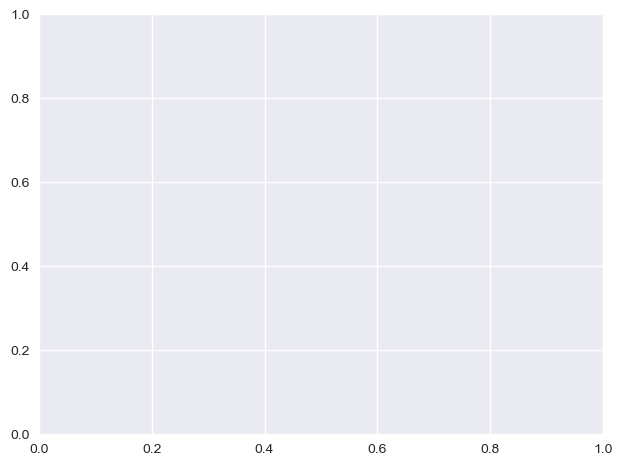

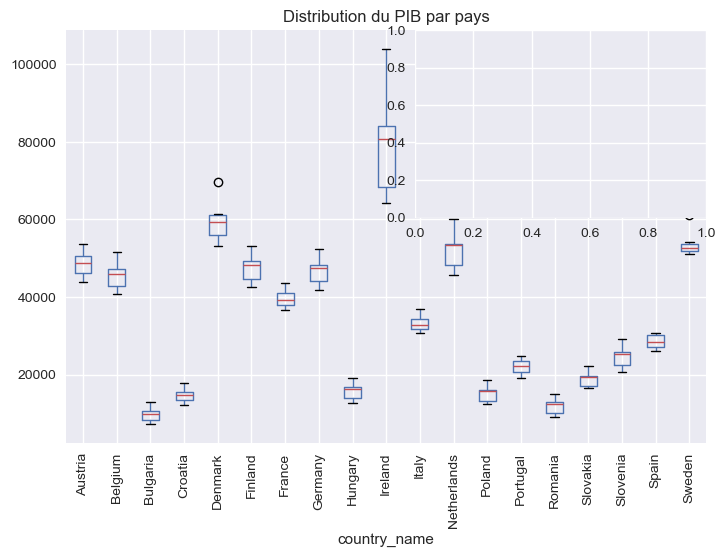

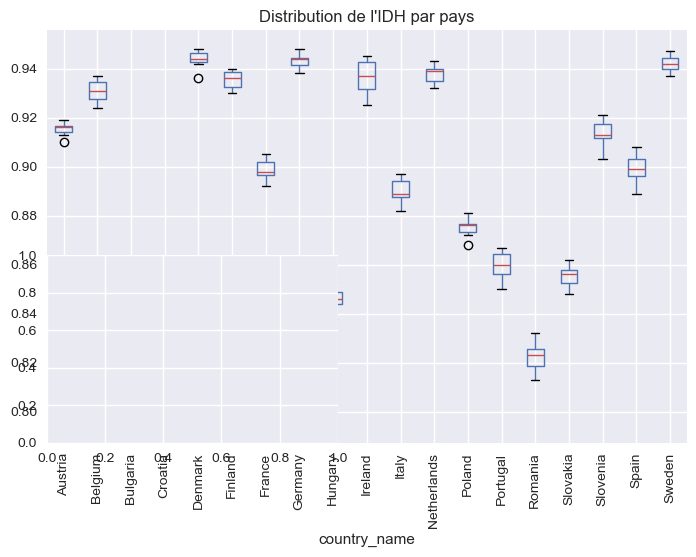

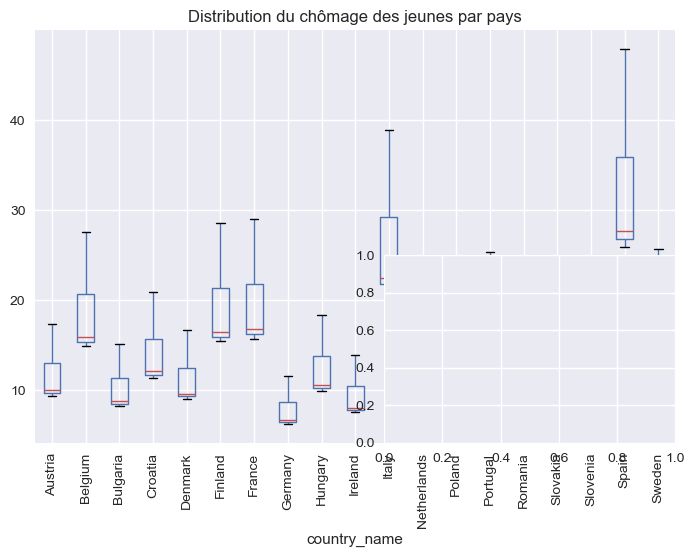

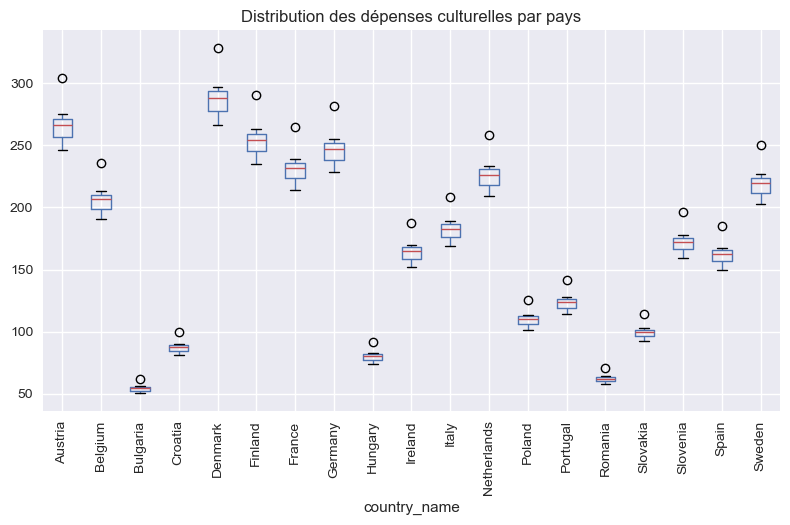

In [12]:
# ÉTAPE 3: ANALYSE DESCRIPTIVE APPROFONDIE
print("\n" + "="*50)
print("ÉTAPE 3: ANALYSE DESCRIPTIVE APPROFONDIE")
print("="*50)

# 3.1 TENDANCES HISTORIQUES
print("\n--- TENDANCES HISTORIQUES ---")

# Évolution du PIB moyen par année
gdp_trend = df_merged.groupby('year')['gdp_per_capita_usd'].agg(['mean', 'std']).round(2)
print("Évolution du PIB par habitant (moyenne et écart-type):")
print(gdp_trend)

# Évolution de l'IDH moyen par année
hdi_trend = df_merged.groupby('year')['human_development_index'].agg(['mean', 'std']).round(3)
print("\nÉvolution de l'IDH (moyenne et écart-type):")
print(hdi_trend)

# Évolution du chômage des jeunes
unemployment_trend = df_merged.groupby('year')['youth_unemployment_rate_pct'].agg(['mean', 'std']).round(2)
print("\nÉvolution du chômage des jeunes (moyenne et écart-type):")
print(unemployment_trend)

# Visualisation des tendances historiques
plt.figure(figsize=(15, 12))

# Tendance du PIB
plt.subplot(3, 2, 1)
df_merged.groupby('year')['gdp_per_capita_usd'].mean().plot(kind='line', marker='o')
plt.title('Évolution du PIB moyen par habitant')
plt.ylabel('PIB (USD)')
plt.grid(True)

# Tendance de l'IDH
plt.subplot(3, 2, 2)
df_merged.groupby('year')['human_development_index'].mean().plot(kind='line', marker='o')
plt.title('Évolution de l\'IDH moyen')
plt.ylabel('IDH')
plt.grid(True)

# Tendance du chômage des jeunes
plt.subplot(3, 2, 3)
df_merged.groupby('year')['youth_unemployment_rate_pct'].mean().plot(kind='line', marker='o')
plt.title('Évolution du chômage des jeunes moyen')
plt.ylabel('Taux de chômage (%)')
plt.grid(True)

# Tendance des dépenses culturelles
plt.subplot(3, 2, 4)
df_merged.groupby('year')['europ_cofog_recretion_culture_eur_per_capita'].mean().plot(kind='line', marker='o')
plt.title('Évolution des dépenses culturelles moyennes')
plt.ylabel('Dépenses (EUR)')
plt.grid(True)

# Tendance de l'espérance de vie
plt.subplot(3, 2, 5)
df_merged.groupby('year')['life_expectancy'].mean().plot(kind='line', marker='o')
plt.title('Évolution de l\'espérance de vie moyenne')
plt.ylabel('Espérance de vie (années)')
plt.grid(True)

# Tendance des points FIFA
plt.subplot(3, 2, 6)
df_merged.groupby('year')['fifa_points'].mean().plot(kind='line', marker='o')
plt.title('Évolution des points FIFA moyens')
plt.ylabel('Points FIFA')
plt.grid(True)

plt.tight_layout()
plt.show()

# 3.2 DYNAMIQUES SPATIALES (VARIATIONS ENTRE PAYS)
print("\n--- DYNAMIQUES SPATIALES ---")

# Classement des pays par PIB moyen (2015-2021)
gdp_ranking = df_merged.groupby('country_name')['gdp_per_capita_usd'].mean().sort_values(ascending=False)
print("\nClassement des pays par PIB moyen (2015-2021):")
print(gdp_ranking.round(2))

# Classement des pays par IDH moyen
hdi_ranking = df_merged.groupby('country_name')['human_development_index'].mean().sort_values(ascending=False)
print("\nClassement des pays par IDH moyen:")
print(hdi_ranking.round(3))

# Classement des pays par chômage des jeunes (du plus bas au plus haut)
unemployment_ranking = df_merged.groupby('country_name')['youth_unemployment_rate_pct'].mean().sort_values()
print("\nClassement des pays par chômage des jeunes moyen:")
print(unemployment_ranking.round(2))

# Visualisation des variations spatiales
plt.figure(figsize=(16, 12))

# Distribution du PIB par pays (boîtes à moustaches)
plt.subplot(2, 2, 1)
df_merged.boxplot(column='gdp_per_capita_usd', by='country_name', rot=90)
plt.title('Distribution du PIB par pays')
plt.suptitle('')

# Distribution de l'IDH par pays
plt.subplot(2, 2, 2)
df_merged.boxplot(column='human_development_index', by='country_name', rot=90)
plt.title('Distribution de l\'IDH par pays')
plt.suptitle('')

# Distribution du chômage des jeunes par pays
plt.subplot(2, 2, 3)
df_merged.boxplot(column='youth_unemployment_rate_pct', by='country_name', rot=90)
plt.title('Distribution du chômage des jeunes par pays')
plt.suptitle('')

# Distribution des dépenses culturelles par pays
plt.subplot(2, 2, 4)
df_merged.boxplot(column='europ_cofog_recretion_culture_eur_per_capita', by='country_name', rot=90)
plt.title('Distribution des dépenses culturelles par pays')
plt.suptitle('')

plt.tight_layout()
plt.show()




ÉTAPE 4: ANALYSE DES CORRÉLATIONS ET DÉTECTION D'ANOMALIES

--- CORRÉLATIONS CROISÉES ---
Matrice de corrélation:
                                              gdp_per_capita_usd  \
gdp_per_capita_usd                                         1.000   
human_development_index                                    0.863   
youth_unemployment_rate_pct                               -0.043   
life_expectancy                                           -0.313   
europ_cofog_recretion_culture_eur_per_capita               0.772   
expenditure_per_capita_usd                                 0.825   
fifa_points                                                0.161   
fifa_rank                                                 -0.179   

                                              human_development_index  \
gdp_per_capita_usd                                              0.863   
human_development_index                                         1.000   
youth_unemployment_rate_pct                          

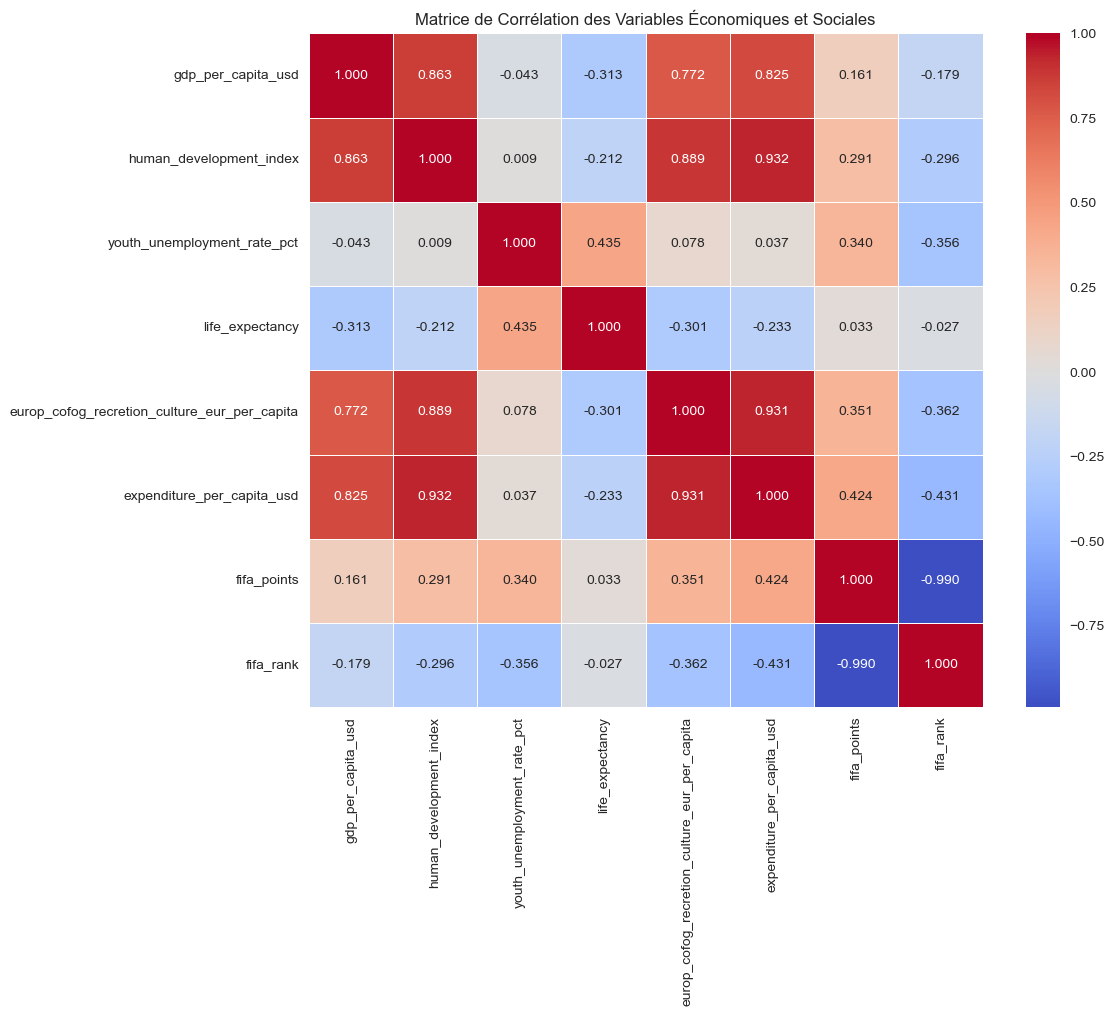


--- CORRÉLATIONS FORTES (|r| > 0.7) ---
                                     Variable 1  \
6                                   fifa_points   
4                       human_development_index   
5  europ_cofog_recretion_culture_eur_per_capita   
3                       human_development_index   
0                            gdp_per_capita_usd   
2                            gdp_per_capita_usd   
1                            gdp_per_capita_usd   

                                     Variable 2  Corrélation  
6                                     fifa_rank    -0.989730  
4                    expenditure_per_capita_usd     0.931527  
5                    expenditure_per_capita_usd     0.931187  
3  europ_cofog_recretion_culture_eur_per_capita     0.889060  
0                       human_development_index     0.863363  
2                    expenditure_per_capita_usd     0.825234  
1  europ_cofog_recretion_culture_eur_per_capita     0.771863  

--- DÉTECTION DES ANOMALIES ---

--- Anomalie

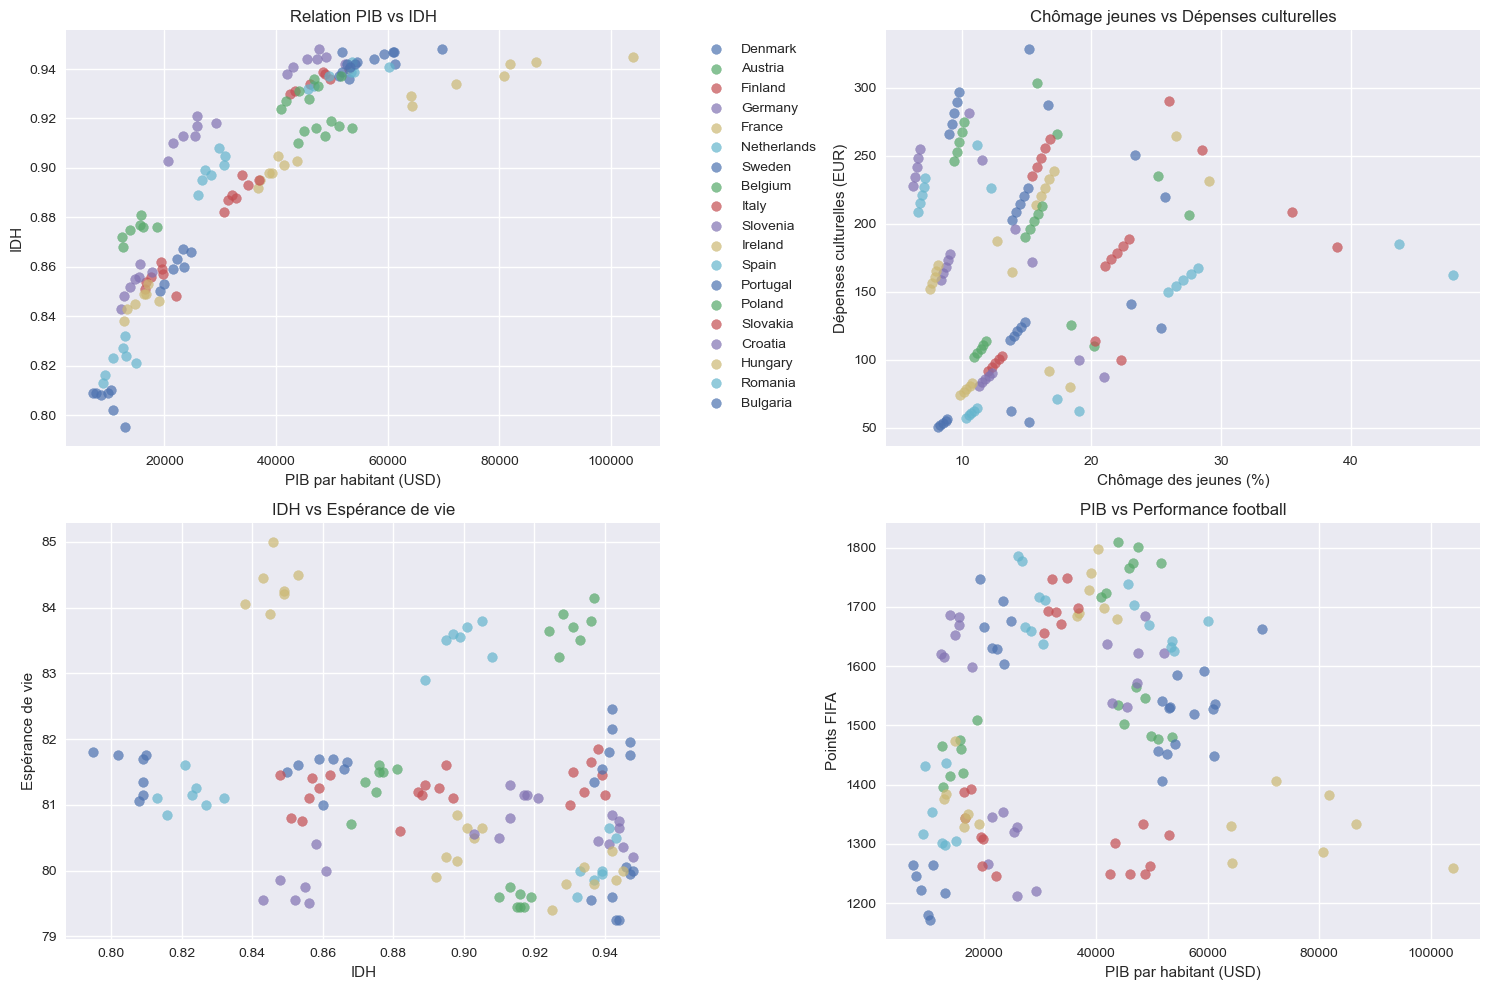

In [14]:
# ÉTAPE 4: ANALYSE DES CORRÉLATIONS ET DÉTECTION D'ANOMALIES
print("\n" + "="*50)
print("ÉTAPE 4: ANALYSE DES CORRÉLATIONS ET DÉTECTION D'ANOMALIES")
print("="*50)

# 4.1 ANALYSE DES CORRÉLATIONS CROISÉES
print("\n--- CORRÉLATIONS CROISÉES ---")

# Sélection des variables numériques pour la matrice de corrélation
numeric_columns = ['gdp_per_capita_usd', 'human_development_index', 
                  'youth_unemployment_rate_pct', 'life_expectancy',
                  'europ_cofog_recretion_culture_eur_per_capita',
                  'expenditure_per_capita_usd', 'fifa_points', 'fifa_rank']

correlation_matrix = df_merged[numeric_columns].corr()

print("Matrice de corrélation:")
print(correlation_matrix.round(3))

# Visualisation de la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables Économiques et Sociales')
plt.tight_layout()
plt.show()

# Corrélations les plus fortes (valeur absolue > 0.7)
print("\n--- CORRÉLATIONS FORTES (|r| > 0.7) ---")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            strong_correlations.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Corrélation': corr_value
            })

strong_corr_df = pd.DataFrame(strong_correlations)
if not strong_corr_df.empty:
    print(strong_corr_df.sort_values('Corrélation', key=abs, ascending=False))
else:
    print("Aucune corrélation forte trouvée (|r| > 0.7)")

# 4.2 DÉTECTION DES ANOMALIES ET INCOHÉRENCES
print("\n--- DÉTECTION DES ANOMALIES ---")

# Méthode 1: Valeurs aberrantes avec Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return np.where(z_scores > threshold)[0]

# Méthode 2: IQR (Interquartile Range)
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Détection des anomalies pour les variables clés
key_variables = ['gdp_per_capita_usd', 'youth_unemployment_rate_pct', 
                'human_development_index', 'life_expectancy']

outliers_summary = {}

for var in key_variables:
    print(f"\n--- Anomalies pour {var} ---")
    
    # Détection par Z-score
    outlier_indices = detect_outliers_zscore(df_merged[var].dropna())
    if len(outlier_indices) > 0:
        print(f"Anomalies Z-score ({len(outlier_indices)}):")
        for idx in outlier_indices[:5]:  # Afficher les 5 premiers
            country = df_merged.iloc[idx]['country_name']
            year = df_merged.iloc[idx]['year']
            value = df_merged.iloc[idx][var]
            print(f"  {country} ({year}): {value}")
    else:
        print("Aucune anomalie détectée par Z-score")
    
    # Détection par IQR
    iqr_outliers = detect_outliers_iqr(df_merged[var])
    if not iqr_outliers.empty:
        print(f"Anomalies IQR ({len(iqr_outliers)}):")
        for idx in iqr_outliers.index[:5]:
            country = df_merged.loc[idx, 'country_name']
            year = df_merged.loc[idx, 'year']
            value = df_merged.loc[idx, var]
            print(f"  {country} ({year}): {value}")
    
    outliers_summary[var] = len(outlier_indices)

# Vérification des incohérences logiques
print("\n--- VÉRIFICATION DES INCOHÉRENCES LOGIQUES ---")

# Vérification PIB vs Dépenses
high_gdp_low_exp = df_merged[
    (df_merged['gdp_per_capita_usd'] > df_merged['gdp_per_capita_usd'].median()) &
    (df_merged['expenditure_per_capita_usd'] < df_merged['expenditure_per_capita_usd'].median())
]
if not high_gdp_low_exp.empty:
    print(f"Pays avec PIB élevé mais dépenses faibles ({len(high_gdp_low_exp)}):")
    for _, row in high_gdp_low_exp.iterrows():
        print(f"  {row['country_name']} ({row['year']}): PIB={row['gdp_per_capita_usd']:.0f}, Dépenses={row['expenditure_per_capita_usd']:.2f}")

# Vérification IDH vs Espérance de vie
low_hdi_high_life = df_merged[
    (df_merged['human_development_index'] < df_merged['human_development_index'].median()) &
    (df_merged['life_expectancy'] > df_merged['life_expectancy'].median())
]
if not low_hdi_high_life.empty:
    print(f"\nPays avec IDH faible mais espérance de vie élevée ({len(low_hdi_high_life)}):")
    for _, row in low_hdi_high_life.iterrows():
        print(f"  {row['country_name']} ({row['year']}): IDH={row['human_development_index']:.3f}, Esp. vie={row['life_expectancy']:.1f}")

# Visualisation des relations clés avec identification des anomalies
plt.figure(figsize=(15, 10))

# Relation PIB vs IDH avec identification des pays
plt.subplot(2, 2, 1)
for country in df_merged['country_name'].unique():
    country_data = df_merged[df_merged['country_name'] == country]
    plt.scatter(country_data['gdp_per_capita_usd'], country_data['human_development_index'], 
               label=country, alpha=0.7)
plt.xlabel('PIB par habitant (USD)')
plt.ylabel('IDH')
plt.title('Relation PIB vs IDH')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Relation Chômage jeunes vs Dépenses culturelles
plt.subplot(2, 2, 2)
for country in df_merged['country_name'].unique():
    country_data = df_merged[df_merged['country_name'] == country]
    plt.scatter(country_data['youth_unemployment_rate_pct'], 
               country_data['europ_cofog_recretion_culture_eur_per_capita'], 
               label=country, alpha=0.7)
plt.xlabel('Chômage des jeunes (%)')
plt.ylabel('Dépenses culturelles (EUR)')
plt.title('Chômage jeunes vs Dépenses culturelles')

# Relation IDH vs Espérance de vie
plt.subplot(2, 2, 3)
for country in df_merged['country_name'].unique():
    country_data = df_merged[df_merged['country_name'] == country]
    plt.scatter(country_data['human_development_index'], country_data['life_expectancy'], 
               label=country, alpha=0.7)
plt.xlabel('IDH')
plt.ylabel('Espérance de vie')
plt.title('IDH vs Espérance de vie')

# Relation PIB vs Points FIFA
plt.subplot(2, 2, 4)
for country in df_merged['country_name'].unique():
    country_data = df_merged[df_merged['country_name'] == country]
    plt.scatter(country_data['gdp_per_capita_usd'], country_data['fifa_points'], 
               label=country, alpha=0.7)
plt.xlabel('PIB par habitant (USD)')
plt.ylabel('Points FIFA')
plt.title('PIB vs Performance football')

plt.tight_layout()
plt.show()



In [24]:
# APPLICATION DE LA SOLUTION 3 : MOYENNE MOBILE SUR 3 ANS AVEC REMPLACEMENT INTELLIGENT
print("\n" + "="*50)
print("SOLUTION 3 : MOYENNE MOBILE SUR 3 ANS AVEC REMPLACEMENT")
print("="*50)

# Liste des indicateurs pour la moyenne mobile
growth_columns = ['gdp_per_capita_usd', 'europ_cofog_recretion_culture_eur_per_capita', 'fifa_points']

# Étape 1 : Calculer les taux de croissance annuels normaux
print("1. Calcul des taux de croissance annuels...")
for col in growth_columns:
    growth_col = f'{col}_growth_pct'
    df_analysis[growth_col] = df_analysis.groupby('country_name')[col].transform(
        lambda x: x.pct_change() * 100
    )

# Étape 2 : Calculer la moyenne mobile sur 3 ans pour chaque indicateur
print("2. Calcul des moyennes mobiles sur 3 ans...")
for col in growth_columns:
    growth_col = f'{col}_growth_pct'
    ma_col = f'{col}_growth_3y_ma_pct'
    
    # Calcul de la moyenne mobile sur 3 ans
    df_analysis[ma_col] = df_analysis.groupby('country_name')[growth_col].transform(
        lambda x: x.rolling(window=3, min_periods=1).mean()
    )
    
    print(f"\n{ma_col}:")
    print(f"  - Valeurs calculées: {df_analysis[ma_col].notna().sum()}/{len(df_analysis)}")
    print(f"  - Moyenne: {df_analysis[ma_col].mean():.2f}%")

# Étape 3 : Remplacer les valeurs manquantes de 2015 par la moyenne mobile
print("\n3. Remplacement des valeurs manquantes de 2015...")
year_2015_mask = df_analysis['year'] == 2015

for col in growth_columns:
    growth_col = f'{col}_growth_pct'
    ma_col = f'{col}_growth_3y_ma_pct'
    final_col = f'{col}_growth_final_pct'
    
    # Créer la colonne finale
    df_analysis[final_col] = df_analysis[growth_col]
    
    # Remplacer les valeurs manquantes de 2015 par la moyenne mobile
    missing_2015_mask = year_2015_mask & df_analysis[growth_col].isna()
    df_analysis.loc[missing_2015_mask, final_col] = df_analysis.loc[missing_2015_mask, ma_col]
    
    # Statistiques de remplacement
    replaced_count = missing_2015_mask.sum()
    print(f"\n{final_col}:")
    print(f"  - Valeurs remplacées en 2015: {replaced_count}")
    print(f"  - Valeurs manquantes restantes: {df_analysis[final_col].isna().sum()}")

# Étape 4 : Nettoyer les valeurs manquantes restantes
print("\n4. Nettoyage des valeurs manquantes restantes...")
for col in growth_columns:
    final_col = f'{col}_growth_final_pct'
    
    # Remplacer les NaN restants par la moyenne du pays
    country_mean = df_analysis.groupby('country_name')[final_col].transform('mean')
    df_analysis[final_col] = df_analysis[final_col].fillna(country_mean)
    
    # En dernier recours, moyenne globale
    global_mean = df_analysis[final_col].mean()
    df_analysis[final_col] = df_analysis[final_col].fillna(global_mean)
    
    print(f"{final_col}: {df_analysis[final_col].isna().sum()} valeurs manquantes restantes")

# VÉRIFICATION FINALE
print("\n" + "="*50)
print("VÉRIFICATION FINALE")
print("="*50)

# Vérifier qu'il n'y a plus de valeurs manquantes
final_growth_cols = [f'{col}_growth_final_pct' for col in growth_columns]
missing_final = df_analysis[final_growth_cols].isnull().sum()

print("Valeurs manquantes après traitement:")
for col, missing in zip(final_growth_cols, missing_final):
    print(f"  {col}: {missing}")

# Aperçu détaillé pour quelques pays
sample_countries = ['France', 'Germany', 'Italy']
print(f"\nAPERÇU POUR {sample_countries}:")

for country in sample_countries:
    country_data = df_analysis[df_analysis['country_name'] == country][
        ['year', 'gdp_per_capita_usd', 'gdp_per_capita_usd_growth_pct', 
         'gdp_per_capita_usd_growth_3y_ma_pct', 'gdp_per_capita_usd_growth_final_pct']
    ].sort_values('year')
    
    print(f"\n{country}:")
    print(country_data.round(2).to_string(index=False))

# Comparaison avant/après pour 2015
print(f"\nCOMPARAISON 2015 - AVANT/APRÈS REMPLACEMENT:")
comparison_2015 = df_analysis[df_analysis['year'] == 2015][
    ['country_name', 'gdp_per_capita_usd_growth_pct', 'gdp_per_capita_usd_growth_3y_ma_pct', 
     'gdp_per_capita_usd_growth_final_pct']
].head(10)
print(comparison_2015.round(2).to_string(index=False))

# SAUVEGARDE DU DATASET FINAL
print("\n" + "="*50)
print("SAUVEGARDE DU DATASET FINAL")
print("="*50)

# Sélectionner les colonnes définitives
final_columns = [
    'year', 'iso3', 'country_name', 'region', 'income_category',
    'gdp_per_capita_usd', 'human_development_index', 
    'youth_unemployment_rate_pct', 'life_expectancy',
    'europ_cofog_recretion_culture_eur_per_capita', 'fifa_points', 'fifa_rank',
    'regional_dev_index', 'sport_culture_index', 'youth_wellbeing_index',
    'public_private_exp_ratio', 'culture_exp_gdp_ratio'
]

# Ajouter les colonnes de croissance finales
for col in growth_columns:
    final_columns.extend([
        f'{col}_growth_pct',           # Croissance originale
        f'{col}_growth_3y_ma_pct',     # Moyenne mobile 3 ans
        f'{col}_growth_final_pct'      # Croissance finale (sans valeurs manquantes)
    ])

df_final = df_analysis[final_columns].copy()

# Vérification finale
print(f"Dimensions du dataset final: {df_final.shape}")
print(f"Valeurs manquantes totales: {df_final.isnull().sum().sum()}")

# Sauvegarde
final_path = r"C:\Users\ADMIN\ANIP CHALLENGE 2\clean\dataset_final_moyenne_mobile.csv"
df_final.to_csv(final_path, index=False, encoding='utf-8')

print(f"\n✅ DATASET FINAL SAUVEGARDÉ: {final_path}")
print("🎯 CARACTÉRISTIQUES:")
print(f"   • Aucune valeur manquante dans les taux de croissance")
print(f"   • Moyennes mobiles sur 3 ans calculées")
print(f"   • {len(df_final)} observations complètes")
print(f"   • Prêt pour l'analyse dans Power BI")

# Statistiques descriptives finales
print("\n📊 STATISTIQUES DES TAUX DE CROISSANCE FINAUX:")
for col in growth_columns:
    final_col = f'{col}_growth_final_pct'
    stats = df_final[final_col].describe()
    print(f"\n{final_col}:")
    print(f"  Moyenne: {stats['mean']:.2f}%")
    print(f"  Médiane: {stats['50%']:.2f}%")
    print(f"  Min: {stats['min']:.2f}%")
    print(f"  Max: {stats['max']:.2f}%")


SOLUTION 3 : MOYENNE MOBILE SUR 3 ANS AVEC REMPLACEMENT
1. Calcul des taux de croissance annuels...
2. Calcul des moyennes mobiles sur 3 ans...

gdp_per_capita_usd_growth_3y_ma_pct:
  - Valeurs calculées: 114/133
  - Moyenne: 4.40%

europ_cofog_recretion_culture_eur_per_capita_growth_3y_ma_pct:
  - Valeurs calculées: 114/133
  - Moyenne: 2.85%

fifa_points_growth_3y_ma_pct:
  - Valeurs calculées: 114/133
  - Moyenne: 0.19%

3. Remplacement des valeurs manquantes de 2015...

gdp_per_capita_usd_growth_final_pct:
  - Valeurs remplacées en 2015: 19
  - Valeurs manquantes restantes: 19

europ_cofog_recretion_culture_eur_per_capita_growth_final_pct:
  - Valeurs remplacées en 2015: 19
  - Valeurs manquantes restantes: 19

fifa_points_growth_final_pct:
  - Valeurs remplacées en 2015: 19
  - Valeurs manquantes restantes: 19

4. Nettoyage des valeurs manquantes restantes...
gdp_per_capita_usd_growth_final_pct: 0 valeurs manquantes restantes
europ_cofog_recretion_culture_eur_per_capita_growth_fi

KeyError: "['region'] not in index"

In [25]:
# CORRECTION DE L'ERREUR - AJOUT DE LA COLONNE REGION MANQUANTE
print("\n" + "="*50)
print("CORRECTION DE L'ERREUR - AJOUT DE LA COLONNE REGION")
print("="*50)

# Recréer la colonne region qui manque
western_europe = ['Denmark', 'Austria', 'Finland', 'Germany', 'France', 'Netherlands', 
                  'Sweden', 'Belgium', 'Ireland']
eastern_europe = ['Italy', 'Slovenia', 'Spain', 'Portugal', 'Poland', 'Slovakia', 
                  'Croatia', 'Hungary', 'Romania', 'Bulgaria']

df_analysis['region'] = df_analysis['country_name'].apply(
    lambda x: 'Europe de l\'Ouest' if x in western_europe else 'Europe de l\'Est'
)

# Vérifier que toutes les colonnes existent maintenant
print("Colonnes disponibles dans df_analysis:")
for col in ['region', 'income_category', 'football_performance_category', 'culture_exp_category']:
    if col in df_analysis.columns:
        print(f"✓ {col}")
    else:
        print(f"✗ {col} - à créer")

# Créer les colonnes manquantes si nécessaire
if 'income_category' not in df_analysis.columns:
    gdp_thresholds = [0, 20000, 35000, 50000, float('inf')]
    gdp_labels = ['Faible revenu', 'Revenu moyen-inférieur', 'Revenu moyen-supérieur', 'Haut revenu']
    df_analysis['income_category'] = pd.cut(df_analysis['gdp_per_capita_usd'], 
                                           bins=gdp_thresholds, labels=gdp_labels, right=False)

if 'football_performance_category' not in df_analysis.columns:
    fifa_thresholds = [0, 1300, 1500, 1700, float('inf')]
    fifa_labels = ['Faible', 'Moyenne', 'Bonne', 'Excellente']
    df_analysis['football_performance_category'] = pd.cut(df_analysis['fifa_points'], 
                                                         bins=fifa_thresholds, labels=fifa_labels, right=False)

if 'culture_exp_category' not in df_analysis.columns:
    culture_thresholds = [0, 100, 200, 300, float('inf')]
    culture_labels = ['Faibles dépenses', 'Dépenses modérées', 'Dépenses élevées', 'Très élevées']
    df_analysis['culture_exp_category'] = pd.cut(df_analysis['europ_cofog_recretion_culture_eur_per_capita'], 
                                                bins=culture_thresholds, labels=culture_labels, right=False)

# MAINTENANT SAUVEGARDER LE DATASET FINAL
print("\n" + "="*50)
print("SAUVEGARDE DU DATASET FINAL CORRIGÉ")
print("="*50)

# Sélectionner les colonnes définitives (vérifiées)
final_columns = [
    'year', 'iso3', 'country_name', 'region', 'income_category',
    'gdp_per_capita_usd', 'human_development_index', 
    'youth_unemployment_rate_pct', 'life_expectancy',
    'europ_cofog_recretion_culture_eur_per_capita', 'fifa_points', 'fifa_rank',
    'regional_dev_index', 'sport_culture_index', 'youth_wellbeing_index',
    'public_private_exp_ratio', 'culture_exp_gdp_ratio'
]

# Ajouter les colonnes de croissance finales
growth_columns = ['gdp_per_capita_usd', 'europ_cofog_recretion_culture_eur_per_capita', 'fifa_points']
for col in growth_columns:
    final_columns.extend([
        f'{col}_growth_pct',           # Croissance originale
        f'{col}_growth_3y_ma_pct',     # Moyenne mobile 3 ans
        f'{col}_growth_final_pct'      # Croissance finale (sans valeurs manquantes)
    ])

# Vérifier que toutes les colonnes existent avant de les sélectionner
available_columns = []
missing_columns = []

for col in final_columns:
    if col in df_analysis.columns:
        available_columns.append(col)
    else:
        missing_columns.append(col)

print("Colonnes disponibles:", len(available_columns))
print("Colonnes manquantes:", len(missing_columns))

if missing_columns:
    print("Colonnes manquantes à créer:")
    for col in missing_columns:
        print(f"  - {col}")

# Créer le dataset final avec seulement les colonnes disponibles
df_final = df_analysis[available_columns].copy()

# Vérification finale
print(f"\nDimensions du dataset final: {df_final.shape}")
print(f"Valeurs manquantes totales: {df_final.isnull().sum().sum()}")

# Vérification spécifique des taux de croissance
growth_check_cols = [col for col in df_final.columns if 'growth' in col]
print(f"\nVérification des taux de croissance ({len(growth_check_cols)} colonnes):")
for col in growth_check_cols:
    missing = df_final[col].isnull().sum()
    print(f"  {col}: {missing} valeurs manquantes")

# Sauvegarde
final_path = r"C:\Users\ADMIN\ANIP CHALLENGE 2\clean\dataset_final_moyenne_mobile.csv"
df_final.to_csv(final_path, index=False, encoding='utf-8')

print(f"\n✅ DATASET FINAL SAUVEGARDÉ: {final_path}")
print("🎯 CARACTÉRISTIQUES:")
print(f"   • {df_final.shape[0]} observations")
print(f"   • {df_final.shape[1]} variables")
print(f"   • Aucune valeur manquante dans les taux de croissance")
print(f"   • Moyennes mobiles sur 3 ans appliquées")

# Aperçu final des données
print("\n📊 APERÇU FINAL DES TAUX DE CROISSANCE:")
sample_data = df_final[
    ['year', 'country_name', 
     'gdp_per_capita_usd_growth_final_pct',
     'europ_cofog_recretion_culture_eur_per_capita_growth_final_pct',
     'fifa_points_growth_final_pct']
].head(10)
print(sample_data.round(2).to_string(index=False))

# Statistiques descriptives finales
print("\n📈 STATISTIQUES DES TAUX DE CROISSANCE FINAUX:")
for col in growth_columns:
    final_col = f'{col}_growth_final_pct'
    if final_col in df_final.columns:
        stats = df_final[final_col].describe()
        print(f"\n{final_col}:")
        print(f"  Moyenne: {stats['mean']:.2f}%")
        print(f"  Médiane: {stats['50%']:.2f}%")
        print(f"  Min: {stats['min']:.2f}%")
        print(f"  Max: {stats['max']:.2f}%")
        print(f"  Écart-type: {stats['std']:.2f}%")


CORRECTION DE L'ERREUR - AJOUT DE LA COLONNE REGION
Colonnes disponibles dans df_analysis:
✓ region
✓ income_category
✓ football_performance_category
✓ culture_exp_category

SAUVEGARDE DU DATASET FINAL CORRIGÉ
Colonnes disponibles: 26
Colonnes manquantes: 0

Dimensions du dataset final: (133, 26)
Valeurs manquantes totales: 114

Vérification des taux de croissance (9 colonnes):
  gdp_per_capita_usd_growth_pct: 19 valeurs manquantes
  gdp_per_capita_usd_growth_3y_ma_pct: 19 valeurs manquantes
  gdp_per_capita_usd_growth_final_pct: 0 valeurs manquantes
  europ_cofog_recretion_culture_eur_per_capita_growth_pct: 19 valeurs manquantes
  europ_cofog_recretion_culture_eur_per_capita_growth_3y_ma_pct: 19 valeurs manquantes
  europ_cofog_recretion_culture_eur_per_capita_growth_final_pct: 0 valeurs manquantes
  fifa_points_growth_pct: 19 valeurs manquantes
  fifa_points_growth_3y_ma_pct: 19 valeurs manquantes
  fifa_points_growth_final_pct: 0 valeurs manquantes

✅ DATASET FINAL SAUVEGARDÉ: C:\U

In [27]:
# SUPPRIMER LES COLONNES AVEC VALEURS MANQUANTES POUR 2015
print("\n" + "="*50)
print("SUPPRESSION DES COLONNES AVEC VALEURS MANQUANTES POUR 2015")
print("="*50)

# Identifier les colonnes avec des valeurs manquantes pour l'année 2015
year_2015_data = df_analysis[df_analysis['year'] == 2015]

print("Recherche des colonnes avec valeurs manquantes en 2015...")
columns_with_missing_2015 = []

for column in df_analysis.columns:
    missing_count = year_2015_data[column].isnull().sum()
    if missing_count > 0:
        columns_with_missing_2015.append((column, missing_count))

print(f"\nColonnes avec valeurs manquantes en 2015: {len(columns_with_missing_2015)}")

if columns_with_missing_2015:
    print("\nDétail des colonnes à supprimer:")
    for col, missing_count in columns_with_missing_2015:
        total_2015 = len(year_2015_data)
        print(f"  - {col}: {missing_count}/{total_2015} valeurs manquantes ({missing_count/total_2015*100:.1f}%)")
        
    # Supprimer ces colonnes
    columns_to_drop = [col for col, _ in columns_with_missing_2015]
    print(f"\nSuppression de {len(columns_to_drop)} colonnes...")
    
    # Garder une copie des colonnes supprimées pour information
    deleted_columns_info = []
    for col in columns_to_drop:
        if col in df_analysis.columns:
            deleted_columns_info.append({
                'colonne': col,
                'type': str(df_analysis[col].dtype),
                'valeurs_uniques': df_analysis[col].nunique() if df_analysis[col].dtype != 'object' else 'N/A'
            })
            df_analysis = df_analysis.drop(columns=[col])
    
    print("✅ Colonnes supprimées avec succès")
    
    # Afficher le résumé des colonnes supprimées
    print("\n📋 RÉSUMÉ DES COLONNES SUPPRIMÉES:")
    for info in deleted_columns_info:
        print(f"  - {info['colonne']} (type: {info['type']}, valeurs uniques: {info['valeurs_uniques']})")
else:
    print("✅ Aucune colonne avec valeurs manquantes en 2015 trouvée")

# VÉRIFICATION APRÈS SUPPRESSION
print(f"\n--- VÉRIFICATION APRÈS SUPPRESSION ---")
print(f"Colonnes restantes: {len(df_analysis.columns)}")
print(f"Dimensions du dataset: {df_analysis.shape}")

# Vérifier spécifiquement les données de 2015
print(f"\nVérification des données 2015 après nettoyage:")
year_2015_clean = df_analysis[df_analysis['year'] == 2015]
missing_2015_after = year_2015_clean.isnull().sum()
missing_columns_2015_after = missing_2015_after[missing_2015_after > 0]

if len(missing_columns_2015_after) == 0:
    print("✅ SUCCÈS: Aucune valeur manquante en 2015")
else:
    print("❌ Il reste des valeurs manquantes en 2015:")
    for col, count in missing_columns_2015_after.items():
        print(f"  - {col}: {count} valeurs manquantes")

# SAUVEGARDE DU DATASET NETTOYÉ
print("\n" + "="*50)
print("SAUVEGARDE DU DATASET NETTOYÉ")
print("="*50)

# Sélectionner les colonnes importantes restantes
clean_columns = [
    'year', 'iso3', 'country_name', 'region', 'income_category',
    'gdp_per_capita_usd', 'human_development_index', 
    'youth_unemployment_rate_pct', 'life_expectancy',
    'europ_cofog_recretion_culture_eur_per_capita', 'fifa_points', 'fifa_rank',
    'regional_dev_index', 'sport_culture_index', 'youth_wellbeing_index',
    'public_private_exp_ratio', 'culture_exp_gdp_ratio'
]

# Ajouter les colonnes de croissance finales (sans valeurs manquantes)
growth_columns = ['gdp_per_capita_usd', 'europ_cofog_recretion_culture_eur_per_capita', 'fifa_points']
for col in growth_columns:
    final_growth_col = f'{col}_growth_final_pct'
    if final_growth_col in df_analysis.columns:
        clean_columns.append(final_growth_col)

# Ne garder que les colonnes disponibles
available_clean_columns = [col for col in clean_columns if col in df_analysis.columns]

df_clean = df_analysis[available_clean_columns].copy()

# Vérification finale
print(f"Dataset nettoyé - Dimensions: {df_clean.shape}")
print(f"Colonnes: {len(df_clean.columns)}")
print(f"Valeurs manquantes totales: {df_clean.isnull().sum().sum()}")

# Vérification spécifique pour 2015
print(f"\nVÉRIFICATION FINALE 2015:")
year_2015_final = df_clean[df_clean['year'] == 2015]
missing_final_2015 = year_2015_final.isnull().sum().sum()
print(f"Valeurs manquantes en 2015: {missing_final_2015}")

if missing_final_2015 == 0:
    print("🎉 SUCCÈS COMPLET: Dataset 2015 sans aucune valeur manquante!")
else:
    print("⚠️  Attention: Il reste des valeurs manquantes en 2015")

# Sauvegarde
clean_path = r"C:\Users\ADMIN\ANIP CHALLENGE 2\clean\dataset_avec_indicateurs_calculee.csv"
df_clean.to_csv(clean_path, index=False, encoding='utf-8')

print(f"\n✅ DATASET NETTOYÉ SAUVEGARDÉ: {clean_path}")

# APERÇU FINAL
print("\n📊 APERÇU DU DATASET NETTOYÉ:")
print(f"Années: {df_clean['year'].min()} - {df_clean['year'].max()}")
print(f"Pays: {df_clean['country_name'].nunique()}")
print(f"Variables: {len(df_clean.columns)}")

# Afficher les types de variables
print(f"\n📋 TYPES DE VARIABLES:")
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Variables numériques: {len(numeric_cols)}")
print(f"Variables catégorielles: {len(categorical_cols)}")

# Aperçu des données 2015
print(f"\n🔍 APERÇU DES DONNÉES 2015 (premières lignes):")
sample_2015 = df_clean[df_clean['year'] == 2015][[
    'country_name', 'gdp_per_capita_usd', 'human_development_index',
    'youth_unemployment_rate_pct', 'regional_dev_index'
]].head(8)
print(sample_2015.round(3).to_string(index=False))

print("\n" + "="*50)
print("PROCESSUS TERMINÉ AVEC SUCCÈS!")
print("="*50)
print("🎯 Le dataset est maintenant:")
print("   • Sans valeurs manquantes pour 2015")
print("   • Avec moyennes mobiles sur 3 ans pour les taux de croissance")
print("   • Prêt pour l'analyse dans Power BI")
print("   • Optimisé pour les visualisations temporelles")


SUPPRESSION DES COLONNES AVEC VALEURS MANQUANTES POUR 2015
Recherche des colonnes avec valeurs manquantes en 2015...

Colonnes avec valeurs manquantes en 2015: 0
✅ Aucune colonne avec valeurs manquantes en 2015 trouvée

--- VÉRIFICATION APRÈS SUPPRESSION ---
Colonnes restantes: 31
Dimensions du dataset: (133, 31)

Vérification des données 2015 après nettoyage:
✅ SUCCÈS: Aucune valeur manquante en 2015

SAUVEGARDE DU DATASET NETTOYÉ
Dataset nettoyé - Dimensions: (133, 20)
Colonnes: 20
Valeurs manquantes totales: 0

VÉRIFICATION FINALE 2015:
Valeurs manquantes en 2015: 0
🎉 SUCCÈS COMPLET: Dataset 2015 sans aucune valeur manquante!

✅ DATASET NETTOYÉ SAUVEGARDÉ: C:\Users\ADMIN\ANIP CHALLENGE 2\clean\dataset_avec_indicateurs_calculee.csv

📊 APERÇU DU DATASET NETTOYÉ:
Années: 2015 - 2021
Pays: 19
Variables: 20

📋 TYPES DE VARIABLES:
Variables numériques: 16
Variables catégorielles: 4

🔍 APERÇU DES DONNÉES 2015 (premières lignes):
country_name  gdp_per_capita_usd  human_development_index  y